In [19]:
import numpy as np                 # for numerical computing
import pandas as pd                # for dataframe and manipulation
import seaborn as sns              #for graphs and data visualization
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
# the preposscing importer is used for cleaning and importing the dataset into a new csv file.

sns.set()

this is a netflix shows dataset which contains a list of all the shows avaible on the platform


In [20]:
net = pd.read_csv("new_dataset.csv")
net.head(9)
# this will show the datas top first 5 shows
# the no of shows you will put i

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
5,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
6,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,"Sukollawat Kanarot, Sushar Manaying, Pavarit M...",missing,"September 23, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Struggling to earn a living in Bangkok, a man ..."
7,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
8,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",missing,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...


In [21]:
net.size
# use to tell the no of data entries in the dataset



68400

In [22]:
net['listed_in'] = net['listed_in'].str.split(',')
#sometimes a show is having mutiple generes in it 
#so it needs to be expoleded into one single genere 
net_exploded = net.explode('listed_in')
net_exploded['listed_in'] = net_exploded['listed_in'].str.strip()  # Clean up extra spaces # This provides the count for the y-axis


#finding the types of shows in each genre


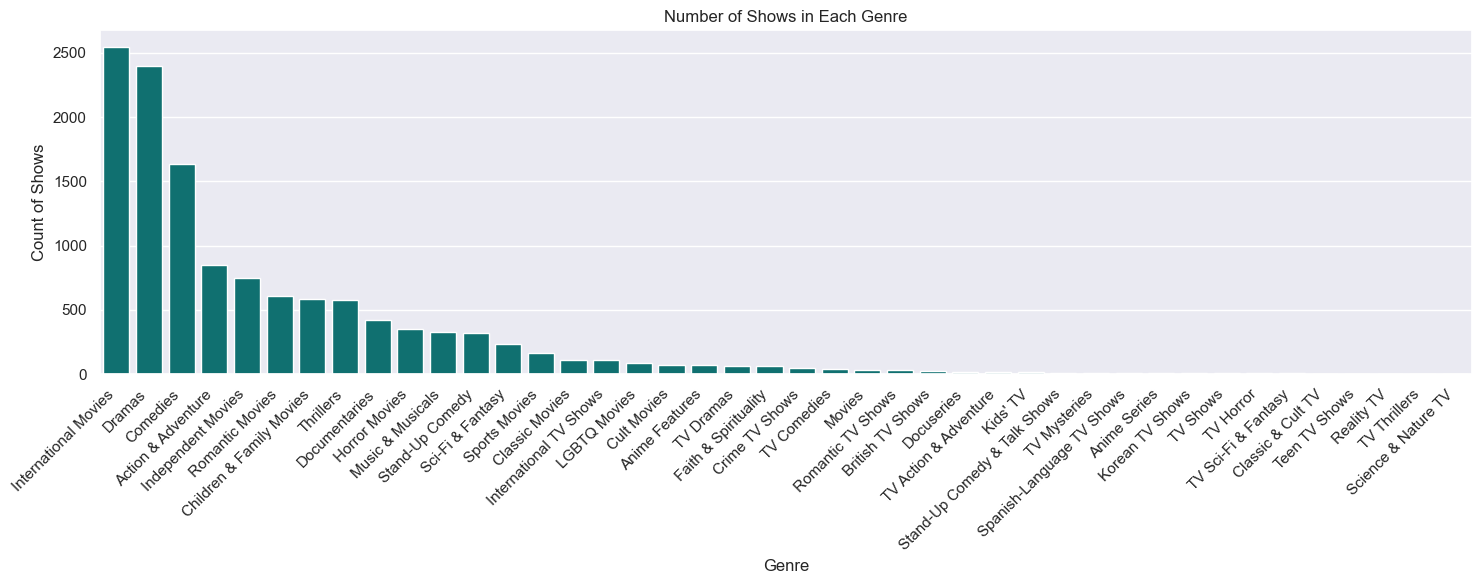

In [23]:
plt.figure(figsize=(15, 6))
sns.countplot(data=net_exploded, x='listed_in', order=net_exploded['listed_in'].value_counts().index, color='teal')
plt.title("Number of Shows in Each Genre")
plt.xlabel("Genre")
plt.ylabel("Count of Shows")
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

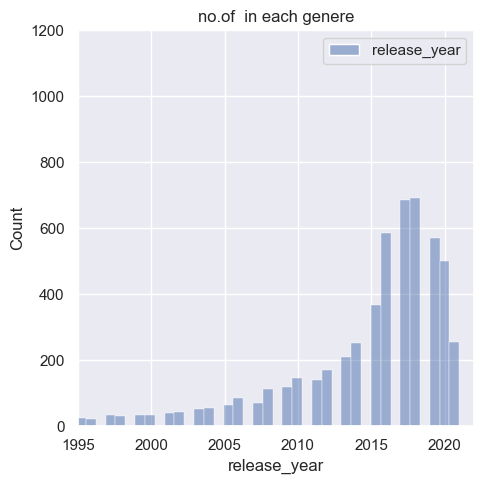

In [24]:
# to tell the no of shows realeased in each year
sns.histplot(data=net).set(title="no.of  in each genere", xlabel="release_year")

plt.gcf().set_size_inches(5, 5)  # Adjust the width and height as needed
plt.ylim(0, 1200) 
plt.xlim(1995, 2022) 
plt.tight_layout()

plt.show()
# change the margins of the code



we can se that most of the shows were realased after 1980 so we can set the the margins to 1995-2020


In [25]:
net.info()
# gives info about the dataset 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5700 non-null   object
 1   type          5700 non-null   object
 2   title         5700 non-null   object
 3   director      5700 non-null   object
 4   cast          5700 non-null   object
 5   country       5700 non-null   object
 6   date_added    5700 non-null   object
 7   release_year  5700 non-null   int64 
 8   rating        5700 non-null   object
 9   duration      5700 non-null   object
 10  listed_in     5700 non-null   object
 11  description   5700 non-null   object
dtypes: int64(1), object(11)
memory usage: 534.5+ KB


now we are going to clean the data of all the null values and also the new data set with that null values

# we have certain coloumns which do not have the directors or the cast in them. To do that we will being with deleting the entire rows for those coloumns.

In [26]:
netflix_new =net.dropna(how='any',subset=['director','cast'])
netflix_new.head()

# here we have the cleaned values of the dataset which contains the 


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",missing,"September 24, 2021",2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",To protect his family from a powerful drug lor...
1,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",missing,"September 24, 2021",2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",The arrival of a charismatic young priest brin...
2,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",missing,"September 24, 2021",2021,PG,91 min,[Children & Family Movies],Equestria's divided. But a bright-eyed hero be...
3,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...","On a photo shoot in Ghana, an American model s..."
4,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"[British TV Shows, Reality TV]",A talented batch of amateur bakers face off in...


In [27]:
 
# here we have installed it in the terminal where you have stored the given folder. 
# this is used for doing the data profilling of the dataset


In [28]:
new_counts = net['type'].value_counts()
new_counts

type
Movie      5522
TV Show     178
Name: count, dtype: int64

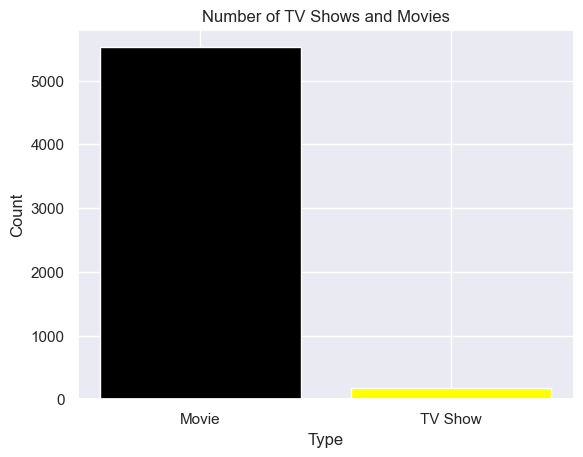

In [29]:
plt.bar(new_counts.index, new_counts.values , color=['black', 'yellow'])
plt.title('Number of TV Shows and Movies')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()
# this is the graph which tell the no of tv shows and the no of movies
# from this graph we see there as


here we have made it to see the no of movies and the no. of tv shows there are there in the dataset


In [30]:
# to find shows the no of shows with each type of reating like 
# to see no of shows in each rating
rating_counts = net['rating'].value_counts()
rating_counts


rating
TV-MA       1939
TV-14       1329
R            789
PG-13        477
TV-PG        456
PG           279
TV-Y7        123
TV-Y         102
TV-G          96
NR            58
G             40
TV-Y7-FV       3
UR             3
NC-17          2
74 min         1
84 min         1
66 min         1
missing        1
Name: count, dtype: int64

In [36]:
type_counts = net['listed_in'].value_counts()
type_counts

listed_in
[Dramas,  International Movies]                           361
[Stand-Up Comedy]                                         309
[Comedies,  Dramas,  International Movies]                271
[Dramas,  Independent Movies,  International Movies]      252
[Children & Family Movies,  Comedies]                     193
                                                         ... 
[International TV Shows,  Korean TV Shows,  TV Dramas]      1
[Comedies,  Music & Musicals,  Sports Movies]               1
[Horror Movies,  LGBTQ Movies,  Music & Musicals]           1
[Comedies,  Cult Movies,  Sci-Fi & Fantasy]                 1
[Cult Movies,  Dramas,  Thrillers]                          1
Name: count, Length: 346, dtype: int64

In [37]:
# we see that there are many types of genres listed in the same column


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5695   NaN
5696   NaN
5697   NaN
5698   NaN
5699   NaN
Name: listed_in, Length: 5700, dtype: float64